# **Project 2**, APS1070 Fall 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: OCT 27, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



In [ ]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_2.ipynb

[NbConvertApp] Converting notebook /content/APS1070_Project_2.ipynb to html
[NbConvertApp] Writing 2507130 bytes to /content/APS1070_Project_2.html


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **[0.1]**

 **284807**
* Which column contains the targets?  **[0.1]**
  
  **Class**
* What is the meaning of target values?

 **1 means the case of fraud and 0 means not fraud** **[0.2]**

In [ ]:
pip install wget

In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard (2).csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
### YOUR CODE HERE ###

df = pd.read_csv('creditcard.csv')
df.head(),print('Number of row is :',len(df))

Number of row is : 284807


(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **[0.1]**

 **Percentage of fraud (1): 0.1727485630620034**

 **Percentage of not fraud (0): 99.82725143693798**
* Is this data considered balanced or unbalanced? Why is this the case? **[0.1]**

  **This is a unbalanced data since more than half of  class is 0**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
  
  **With imbalance data , a KNN classifier will have strong bias when selecting the majority class. Therefore, the fraud class (1) will be not correctly indentified**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**

  **We should use confusion matrix to evaluate a model with imbalance dataset. In addition, we can use percision, recall, AUC and F1 score to evalue this model depends on the problem**


In [ ]:
### YOUR CODE HERE ###
total_counts = df['Class'].value_counts()
Class_1 = (df['Class'].value_counts()[1] / len(df)) * 100
Class_0 = (df['Class'].value_counts()[0] / len(df)) * 100

print("Percentage of fraud (1):", Class_1)
print("Percentage of not fraud (0):", Class_0)


Percentage of fraud (1): 0.1727485630620034
Percentage of not fraud (0): 99.82725143693798


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
from sklearn.model_selection import train_test_split

#Drop 'Class' from X and append to y
X = df.drop('Class', axis=1)
y = df['Class']

#Split dataset train:val:test = 7:1.5:1.5
X_train, X_tv, y_train, y_tv = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tv, y_tv, test_size=0.5, random_state=0)

print(X_train.shape,X_val.shape,X_test.shape),
print(y_train.shape,y_val.shape,y_test.shape)

#print(X_train,X_val,X_test),
#print(y_train,y_val,y_test)



(199364, 30) (42721, 30) (42722, 30)
(199364,) (42721,) (42722,)


Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount


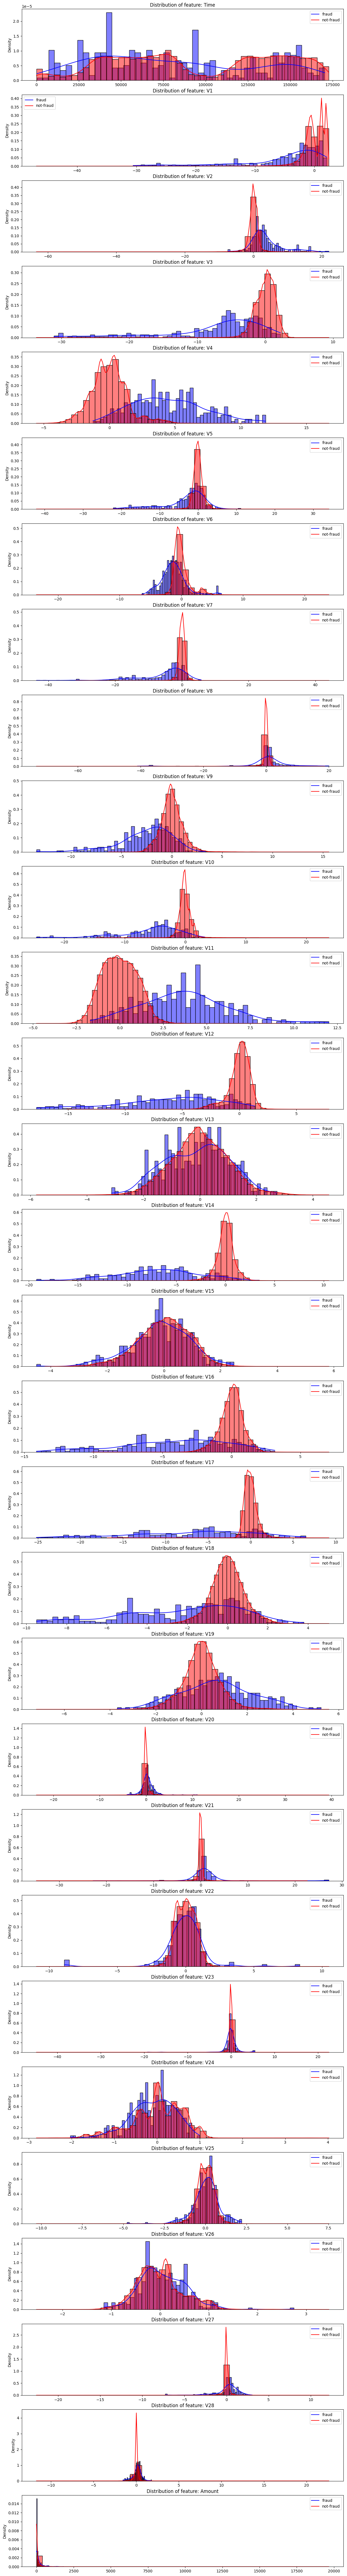

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**The above graphs clearly display the distribution of fraud and non-fraud transactions, which can be used to determine the number of components for a Gaussian Mixture model.**

**In addition, the most valuable features can also be selected from the above graphs based on the trends observed in the fraud and non-fraud distributions.**

**Lastly, the number of outliers for each feature can be detected, which can serve as ground truth when cross-validating the results in the following questions.**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**
 ***The result are completely different because of we only consider not-fraud transactions in part2b.Threshold and AUC score can not be calculated with only one class present in the dataset. Eventully, F1 score will becomes zero because percions and recall score can not be obtained due to the same resason***





In [ ]:
#Drop Time and Amount columns since its unesserssary for further quesiton
X_train = X_train.drop(['Time','Amount'], axis=1)
X_val = X_val.drop(['Time','Amount'], axis=1)


In [ ]:
###Part A###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize

#Initialize variable and gaussian model
gm = GaussianMixture(n_components=1, random_state=0)
auc_scores = []
sample_scores_val = []
part2_result = {}

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns:
    gm.fit(X_train[[feature]])

    # Calculate the AUC
    auc_train = roc_auc_score(y_train, -gm.score_samples(X_train[[feature]]))
    temp_sample_score = -gm.score_samples(X_val[[feature]])
    auc_valid = roc_auc_score(y_val, temp_sample_score)

    #Save AUC results
    auc_scores.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_val.append({'Feature': feature, 'Sample_score': temp_sample_score})

auc_scores = pd.DataFrame(auc_scores)
auc_scores = auc_scores.sort_values(by='AUC_valid', ascending=False)
best_features = auc_scores.head(3)

# Calculate F1 and optimal threhold for best 3 features
for feature in best_features['Feature']:

    scores = [item['Sample_score'] for item in sample_scores_val if item['Feature'] == feature][0]
    # Normalize data to fit with thresholds
    normalized_scores = normalize(scores.reshape(1, -1), norm='max').flatten()
    thresholds = np.arange(0.01, 1.00, 0.01)

    # Calculate F1 scores
    f1_scores = [f1_score(y_val, normalized_scores > threshold) for threshold in thresholds]

    # Find the optimal threshold and correspond F1 score
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    part2_result[feature] = optimal_threshold
    best_f1_scores = f1_score(y_val, normalized_scores > optimal_threshold)
    part2_result[feature] = (part2_result[feature],best_f1_scores)

part2_result = pd.DataFrame(part2_result.values(), index = part2_result.keys(), columns=['Optimal_threshold', 'F1 score'])
print("Best three features with AUC scores:\n",best_features)
part2_result


Best three features with AUC scores:
    Feature  AUC_train  AUC_valid
13     V14   0.952459   0.938073
9      V10   0.913600   0.905959
3       V4   0.892103   0.888283


,Optimal_threshold,F1 score
V14,0.11,0.576271
V10,0.49,0.255814
V4,0.15,0.355140


In [ ]:
# Slice the train and val data based on best feature from Part-2a
best_features_part2a = ['V14', 'V10', 'V4']
X_train_select = X_train[best_features_part2a]
X_val_select = X_val[best_features_part2a]
X_train_filtered = X_train_select[y_train == 0]
X_val_filtered = X_val_select[y_val == 0]
y_train_filtered = y_train[y_train == 0]
y_val_filtered = y_val[y_val == 0]

In [ ]:
###Part B###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize

#Initialize Variable and Gaussian model
gm1 = GaussianMixture(n_components=1, random_state=0)
auc_scores_2b = []
sample_scores_val_2b = []
part2_result_2b = {}

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train_filtered.columns:
    gm1.fit(X_train_filtered[[feature]])

    # Calculate the AUC (Fail to calculate since only one class exist in the dataset)

    #auc_train_2b = roc_auc_score(y_train_filtered, -gm.score_samples(X_train_filtered[[feature]]))
    temp_sample_score_2b = -gm1.score_samples(X_val_filtered[[feature]])
    #auc_valid_2b = roc_auc_score(y_val_filtered, temp_sample_score)
    #auc_scores_2b.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_val_2b.append({'Feature': feature, 'Sample_score': temp_sample_score_2b})
#auc_scores_2b = pd.DataFrame(auc_scores_2b)


for feature in best_features_part2a:
    scores_2b = [item['Sample_score'] for item in sample_scores_val_2b if item['Feature'] == feature][0]

    # Normalize data to fit with thresholds
    normalized_scores_2b = normalize(scores_2b.reshape(1, -1), norm='max').flatten()
    thresholds = np.arange(0.01, 1.00, 0.01)

    # Calculate F1 scores
    f1_scores_2b = [f1_score(y_val_filtered, normalized_scores_2b > threshold) for threshold in thresholds]

    # Find the optimal threshold and correspond F1 score
    optimal_threshold_2b = thresholds[np.argmax(f1_scores_2b)]
    part2_result_2b[feature] = optimal_threshold_2b
    best_f1_scores_2b = f1_score(y_val_filtered, normalized_scores_2b > optimal_threshold_2b)
    part2_result_2b[feature] = (part2_result_2b[feature],best_f1_scores_2b)

# Combine all results
df_part2a = pd.DataFrame(part2_result).T
df_part2a.columns = ['Optimal Threshold (2a)', 'F1 Score (2a)']
best_features_table = {"AUC_train Score (2a)": [0.952459, 0.913600, 0.892103],
                      "AUC_valid Score (2a)": [0.938073, 0.905959, 0.888283]}
df_best_features = pd.DataFrame(best_features_table,index=["V14", "V10", "V4"])

df_part2b = pd.DataFrame(part2_result_2b).T
df_part2b.columns = ['Optimal Threshold (2b)', 'F1 Score (2b)']
df_part2b['AUC_train Score (2b)'] = ['NaN','NaN','NaN']
df_part2b['AUC_val Score (2b)'] = ['NaN','NaN','NaN']
df_part2a = pd.concat([df_part2a, df_best_features],axis=1)
comparison_table = pd.concat([df_part2a, df_part2b], axis=1)
comparison_table


,Optimal Threshold (2a),F1 Score (2a),AUC_train Score (2a),AUC_valid Score (2a),Optimal Threshold (2b),F1 Score (2b),AUC_train Score (2b),AUC_val Score (2b)
V14,0.11,0.576271,0.952459,0.938073,0.01,0.0,NaN,NaN
V10,0.49,0.255814,0.913600,0.905959,0.01,0.0,NaN,NaN
V4,0.15,0.355140,0.892103,0.888283,0.01,0.0,NaN,NaN


## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





In [ ]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

def Part3a_cal(feature1, feature2, n):
    # Select features for the scatter plot
    select_feature_p3 = [feature1,feature2]
    f1 = select_feature_p3[0]
    f2 = select_feature_p3[1]

    valid_data = X_val[y_val == 0]
    fraud_data = X_val[y_val == 1]

    # Create scatter plot of selected features
    plt.scatter(valid_data[f1], valid_data[f2], c='b', label='Not Fraud', marker='x', alpha=0.5)
    plt.scatter(fraud_data[f1], fraud_data[f2], c='r', label='Fraud', marker='x', alpha=0.5)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(f'Scatter Plot of {feature1} vs. {feature2}')

    n_components = n  # Based on diagram observation , default is 1

    # Fit a Gaussian model on all data points
    gm_p3 = GaussianMixture(n_components=n_components, random_state=0)
    gm_p3.fit(X_train[select_feature_p3])

    # Calculate AUC on both training and validation sets
    auc_train_p3 = roc_auc_score(y_train, -gm_p3.score_samples(X_train[select_feature_p3]))
    auc_valid_p3 = roc_auc_score(y_val, -gm_p3.score_samples(X_val[select_feature_p3]))

    # Find a threshold to maximize the validation set F1 Score
    sample_scores_val_p3 = -gm_p3.score_samples(X_val[select_feature_p3])
    normalized_scores_p3 = normalize(sample_scores_val_p3.reshape(1, -1), norm='max').flatten()
    thresholds = np.arange(0.01, 1.00, 0.01)
    f1_scores_p3 = [f1_score(y_val, normalized_scores_p3 > threshold) for threshold in thresholds]
    optimal_threshold_p3 = thresholds[np.argmax(f1_scores_p3)]

    # Indentify and plot ourlier
    outliers = normalized_scores_p3 > optimal_threshold_p3
    plt.scatter(X_val[f1][outliers == 1], X_val[f2][outliers == 1], marker="o", label="outlier", facecolor="none", edgecolor="g", s=70)
    plt.legend()
    plt.show()

    # Print the results
    print("Selected Feature are:",select_feature_p3)
    print("Number of Gaussian Components: ",n_components)
    print("AUC_Training:",auc_train_p3)
    print("AUC_Validate:",auc_valid_p3)
    print("Optimal Threshold:",optimal_threshold_p3)

    return


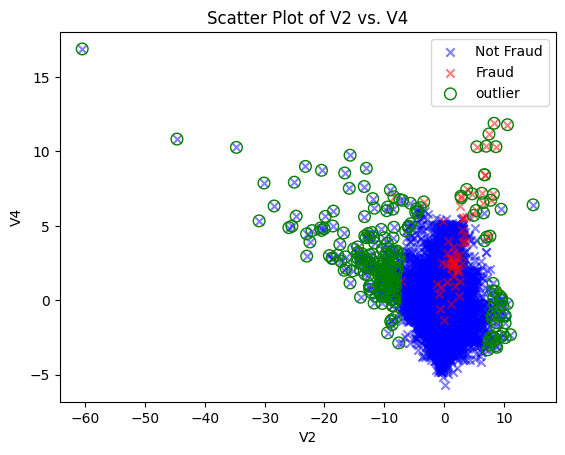

Selected Feature are: ['V2', 'V4']
Number of Gaussian Components:  1
AUC_Training: 0.9025990162908487
AUC_Validate: 0.8945328218941864
Optimal Threshold: 0.02


In [ ]:
Part3a_cal('V2', 'V4', 1)

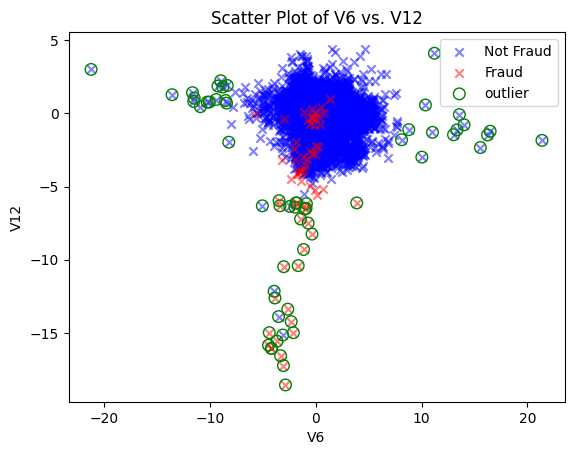

Selected Feature are: ['V6', 'V12']
Number of Gaussian Components:  1
AUC_Training: 0.9132589409022269
AUC_Validate: 0.8365077832108272
Optimal Threshold: 0.12


In [ ]:
Part3a_cal('V6', 'V12', 1)

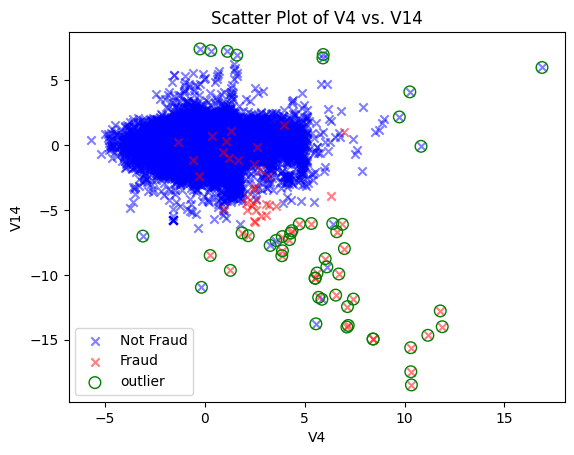

Selected Feature are: ['V4', 'V14']
Number of Gaussian Components:  1
AUC_Training: 0.9665410869299421
AUC_Validate: 0.9447735999983204
Optimal Threshold: 0.12


In [ ]:
Part3a_cal('V4', 'V14', 1)

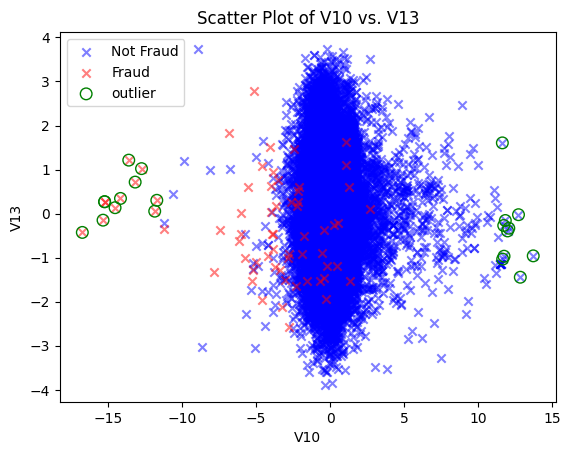

Selected Feature are: ['V10', 'V13']
Number of Gaussian Components:  1
AUC_Training: 0.9166390566016164
AUC_Validate: 0.9089466159146593
Optimal Threshold: 0.49


In [ ]:
Part3a_cal('V10', 'V13', 1)

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
### YOUR CODE HERE ###

#Initalize all variable
best_f1_score_val = 0
best_f1_score_train = 0
best_feature_val = ""
best_feature_train = ""
best_c = 0

# Fit two GaussianMixture models on not-fraud and fraud only
for feature in X_train.columns:
    valid_data_train = X_train[y_train == 0][feature].values.reshape(-1, 1)
    fraud_data_train = X_train[y_train == 1][feature].values.reshape(-1, 1)
    #Fit GaussianMixture on not-fraud
    gm_p4_1 = GaussianMixture(n_components=1, random_state=0)
    gm_p4_1.fit(valid_data_train)

    # Fit GaussianMixture on fraud
    gm_p4_2 = GaussianMixture(n_components=1, random_state=0)
    gm_p4_2.fit(fraud_data_train)

    # Compute score samples
    X_val_p4 = X_val[feature].values.reshape(-1, 1)
    X_train_p4 = X_train[feature].values.reshape(-1, 1)
    S1_val = gm_p4_1.score_samples(X_val_p4)
    S2_val = gm_p4_2.score_samples(X_val_p4)
    S1_train = gm_p4_1.score_samples(X_train_p4)
    S2_train = gm_p4_2.score_samples(X_train_p4)

    # Find optimal c and best f1 score from the validation set
    optimal_c_val = 0
    optimal_f1_val = 0
    optimal_feature_val = ""
    C_range = np.arange(0, 10.1, 0.1)

    #Iterate over to find best C
    for c in C_range:
        classif_formula_val = (S1_val < c * S2_val).astype(int)
        f1_p4_val = f1_score(y_val, classif_formula_val)
        if f1_p4_val > optimal_f1_val:
            optimal_f1_val = f1_p4_val
            optimal_c_val = c
            optimal_feature_val = feature
    #Save results
    if optimal_f1_val > best_f1_score_val:
        best_f1_score_val = optimal_f1_val
        best_c = optimal_c_val
        best_feature_val = optimal_feature_val

    # Use optimal c to find best f1 score for the training set
    optimal_f1_train = 0
    optimal_feature_train = ""


    classif_formula_train = (S1_train < best_c * S2_train).astype(int)
    f1_p4_train = f1_score(y_train, classif_formula_train)
    if f1_p4_train > optimal_f1_train:
        optimal_f1_train = f1_p4_train
        optimal_feature_train = feature

    if optimal_f1_train > best_f1_score_train:
        best_f1_score_train = optimal_f1_train
        best_feature_train = optimal_feature_train

print("Best F1 Score (Validation):", best_f1_score_val)
print("Best Feature (Validation):", best_feature_val)
print("Best c (Validate):", best_c)
print("\nBest F1 Score (Training):", best_f1_score_train)
print("Best Feature (Training):", best_feature_train)


Best F1 Score (Validation): 0.6545454545454547
Best Feature (Validation): V17
Best c (Validate): 7.2

Best F1 Score (Training): 0.6830870279146141
Best Feature (Training): V12


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

In [ ]:
### Model 1 Set up : 1 Gaussian//1 number of components//Runing on 28 features ###
n_comp_p51 = 1
gm_p51 = GaussianMixture(n_components=n_comp_p51, random_state=0)

#Initalize all variable
auc_scores_p51 = []
sample_scores_train_p51 = []
sample_scores_val_p51 = []
best_f1_score_train_p51 = 0
best_f1_score_val_p51 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns:
    gm_p51.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p51.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p51.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train,temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p51.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p51.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p51.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find best feature
auc_scores_p51 = pd.DataFrame(auc_scores_p51)
best_features_p51 = auc_scores_p51.sort_values(by='AUC_valid', ascending=False)
best_feature_p51 = best_features_p51.iloc[0]['Feature']

scores_p51_train = [item['Sample_score'] for item in sample_scores_train_p51 if item['Feature'] == best_feature_p51][0]
scores_p51_val = [item['Sample_score'] for item in sample_scores_val_p51 if item['Feature'] == best_feature_p51][0]


# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p51_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p51_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p51 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p51 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best f1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p51)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p51)]
best_f1_score_train_p51 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p51 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p51)
print("\nBest feature:", best_feature_p51)
print("\nNumber of features:", 28)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p51)
print("\nBest F1 score for training data:", best_f1_score_train_p51)
print("\nBest F1 score for validate data:", best_f1_score_val_p51)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.705102   0.694811
1       V2   0.837499   0.837800
2       V3   0.876537   0.838364
3       V4   0.892103   0.888283
4       V5   0.771825   0.786857
5       V6   0.734380   0.673559
6       V7   0.862967   0.867423
7       V8   0.773238   0.774130
8       V9   0.802874   0.776739
9      V10   0.913600   0.905959
10     V11   0.897175   0.882058
11     V12   0.920180   0.837909
12     V13   0.572152   0.561798
13     V14   0.952459   0.938073
14     V15   0.514764   0.509647
15     V16   0.902137   0.882852
16     V17   0.934852   0.881858
17     V18   0.808030   0.785790
18     V19   0.741874   0.770560
19     V20   0.734692   0.686071
20     V21   0.833521   0.764318
21     V22   0.561287   0.493503
22     V23   0.696326   0.660997
23     V24   0.469229   0.497913
24     V25   0.574918   0.521330
25     V26   0.503272   0.516492
26     V27   0.835479   0.766315
27     V28   0.814201   0.794233

Best feature: V14

In [ ]:
# Model 2 Set up: 1 Gaussian, 1 number of components, Running on 14 features
n_comp_p52 = 1
gm_p52 = GaussianMixture(n_components=n_comp_p52, random_state=0)

# Initialize all variables
auc_scores_p52 = []
sample_scores_train_p52 = []
sample_scores_val_p52 = []
best_f1_score_train_p52 = 0
best_f1_score_val_p52 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns[:14]:
    gm_p52.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p52.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p52.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p52.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p52.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p52.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p52 = pd.DataFrame(auc_scores_p52)
best_features_p52 = auc_scores_p52.sort_values(by='AUC_valid', ascending=False)
best_feature_p52 = best_features_p52.iloc[0]['Feature']

scores_p52_train = [item['Sample_score'] for item in sample_scores_train_p52 if item['Feature'] == best_feature_p52][0]
scores_p52_val = [item['Sample_score'] for item in sample_scores_val_p52 if item['Feature'] == best_feature_p52][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p52_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p52_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p52 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p52 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p52)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p52)]
best_f1_score_train_p52 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p52 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p52)
print("\nBest feature:", best_feature_p52)
print("\nNumber of features:", 14)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p52)
print("\nBest F1 score for training data:", best_f1_score_train_p52)
print("\nBest F1 score for validate data:", best_f1_score_val_p52)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.705102   0.694811
1       V2   0.837499   0.837800
2       V3   0.876537   0.838364
3       V4   0.892103   0.888283
4       V5   0.771825   0.786857
5       V6   0.734380   0.673559
6       V7   0.862967   0.867423
7       V8   0.773238   0.774130
8       V9   0.802874   0.776739
9      V10   0.913600   0.905959
10     V11   0.897175   0.882058
11     V12   0.920180   0.837909
12     V13   0.572152   0.561798
13     V14   0.952459   0.938073

Best feature: V14

Number of features: 14

Number of Gaussians: 1

Number of Gaussians component: 1

Best F1 score for training data: 0.6130500758725341

Best F1 score for validate data: 0.576271186440678


In [ ]:
# Model 3 Set up: 1 Gaussian, 10 number of components, Running on 28 feature
n_comp_p53 = 10
gm_p53 = GaussianMixture(n_components=n_comp_p53, random_state=0)

# Initialize all variables
auc_scores_p53 = []
sample_scores_train_p53 = []
sample_scores_val_p53 = []
best_f1_score_train_p53 = 0
best_f1_score_val_p53 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns:
    gm_p53.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p53.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p53.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p53.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p53.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p53.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p53 = pd.DataFrame(auc_scores_p53)
best_features_p53 = auc_scores_p53.sort_values(by='AUC_valid', ascending=False)
best_feature_p53 = best_features_p53.iloc[0]['Feature']

scores_p53_train = [item['Sample_score'] for item in sample_scores_train_p53 if item['Feature'] == best_feature_p53][0]
scores_p53_val = [item['Sample_score'] for item in sample_scores_val_p53 if item['Feature'] == best_feature_p53][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p53_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p53_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p53 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p53 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p53)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p53)]
best_f1_score_train_p53 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p53 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p53)
print("\nBest feature:", best_feature_p53)
print("\nNumber of features:", 28)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p53)
print("\nBest F1 score for training data:", best_f1_score_train_p53)
print("\nBest F1 score for validate data:", best_f1_score_val_p53)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.802774   0.753485
1       V2   0.824357   0.835710
2       V3   0.890563   0.849528
3       V4   0.899470   0.886697
4       V5   0.772969   0.787252
5       V6   0.733411   0.690755
6       V7   0.862160   0.861518
7       V8   0.771693   0.775202
8       V9   0.798180   0.770061
9      V10   0.921531   0.912123
10     V11   0.898670   0.874253
11     V12   0.929234   0.869802
12     V13   0.578578   0.566649
13     V14   0.952777   0.938047
14     V15   0.525674   0.502787
15     V16   0.901862   0.871131
16     V17   0.944764   0.894817
17     V18   0.806020   0.782969
18     V19   0.741871   0.769378
19     V20   0.742089   0.705388
20     V21   0.840741   0.782517
21     V22   0.559919   0.509265
22     V23   0.693223   0.650578
23     V24   0.532453   0.523475
24     V25   0.569788   0.579214
25     V26   0.531429   0.557692
26     V27   0.836229   0.768687
27     V28   0.812415   0.793299

Best feature: V14

In [ ]:
# Model 4 Set up: 1 Gaussian, 10 number of components, Running on 14 features
n_comp_p54 = 10
gm_p54 = GaussianMixture(n_components=n_comp_p54, random_state=0)

# Initialize all variables
auc_scores_p54 = []
sample_scores_train_p54 = []
sample_scores_val_p54 = []
best_f1_score_train_p54 = 0
best_f1_score_val_p54 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns[:14]:
    gm_p54.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p54.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p54.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p54.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p54.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p54.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p54 = pd.DataFrame(auc_scores_p54)
best_features_p54 = auc_scores_p54.sort_values(by='AUC_valid', ascending=False)
best_feature_p54 = best_features_p54.iloc[0]['Feature']

scores_p54_train = [item['Sample_score'] for item in sample_scores_train_p54 if item['Feature'] == best_feature_p54][0]
scores_p54_val = [item['Sample_score'] for item in sample_scores_val_p54 if item['Feature'] == best_feature_p54][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p54_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p54_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p54 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p54 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p54)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p54)]
best_f1_score_train_p54 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p54 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p54)
print("\nBest feature:", best_feature_p54)
print("\nNumber of features:", 14)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p54)
print("\nBest F1 score for training data:", best_f1_score_train_p54)
print("\nBest F1 score for validate data:", best_f1_score_val_p54)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.802774   0.753485
1       V2   0.824357   0.835710
2       V3   0.890563   0.849528
3       V4   0.899470   0.886697
4       V5   0.772969   0.787252
5       V6   0.733411   0.690755
6       V7   0.862160   0.861518
7       V8   0.771693   0.775202
8       V9   0.798180   0.770061
9      V10   0.921531   0.912123
10     V11   0.898670   0.874253
11     V12   0.929234   0.869802
12     V13   0.578578   0.566649
13     V14   0.952777   0.938047

Best feature: V14

Number of features: 14

Number of Gaussians: 1

Number of Gaussians component: 10

Best F1 score for training data: 0.5804816223067174

Best F1 score for validate data: 0.5170068027210885


In [ ]:
# Model 5 Set up: 1 Gaussian, 10 number of components, Running on 1 features
n_comp_p55 = 10
gm_p55 = GaussianMixture(n_components=n_comp_p55, random_state=0)

# Initialize all variables
auc_scores_p55 = []
sample_scores_train_p55 = []
sample_scores_val_p55 = []
best_f1_score_train_p55 = 0
best_f1_score_val_p55 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns[:1]:
    gm_p55.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p55.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p55.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p55.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p55.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p55.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p55 = pd.DataFrame(auc_scores_p55)
best_features_p55 = auc_scores_p55.sort_values(by='AUC_valid', ascending=False)
best_feature_p55 = best_features_p55.iloc[0]['Feature']

scores_p55_train = [item['Sample_score'] for item in sample_scores_train_p55 if item['Feature'] == best_feature_p55][0]
scores_p55_val = [item['Sample_score'] for item in sample_scores_val_p55 if item['Feature'] == best_feature_p55][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p55_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p55_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p55 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p55 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p55)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p55)]
best_f1_score_train_p55 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p55 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p55)
print("\nBest feature:", best_feature_p55)
print("\nNumber of features:", 1)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p55)
print("\nBest F1 score for training data:", best_f1_score_train_p55)
print("\nBest F1 score for validate data:", best_f1_score_val_p55)



Feature with AUC data:
   Feature  AUC_train  AUC_valid
0      V1   0.802774   0.753485

Best feature: V1

Number of features: 1

Number of Gaussians: 1

Number of Gaussians component: 10

Best F1 score for training data: 0.14985590778097982

Best F1 score for validate data: 0.09661835748792269


In [ ]:
# Model 6 Set up: 1 Gaussian, 30 number of components, Running on 28 feature
n_comp_p56 = 30
gm_p56 = GaussianMixture(n_components=n_comp_p56, random_state=0)

# Initialize all variables
auc_scores_p56 = []
sample_scores_train_p56 = []
sample_scores_val_p56 = []
best_f1_score_train_p56 = 0
best_f1_score_val_p56 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns:
    gm_p56.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p56.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p56.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p56.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p56.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p56.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p56 = pd.DataFrame(auc_scores_p56)
best_features_p56 = auc_scores_p56.sort_values(by='AUC_valid', ascending=False)
best_feature_p56 = best_features_p56.iloc[0]['Feature']

scores_p56_train = [item['Sample_score'] for item in sample_scores_train_p56 if item['Feature'] == best_feature_p56][0]
scores_p56_val = [item['Sample_score'] for item in sample_scores_val_p56 if item['Feature'] == best_feature_p56][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p56_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p56_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p56 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p56 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p56)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p56)]
best_f1_score_train_p56 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p56 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p56)
print("\nBest feature:", best_feature_p56)
print("\nNumber of features:", 28)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p56)
print("\nBest F1 score for training data:", best_f1_score_train_p56)
print("\nBest F1 score for validate data:", best_f1_score_val_p56)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.801966   0.753303
1       V2   0.827625   0.836366
2       V3   0.888012   0.843517
3       V4   0.897352   0.889592
4       V5   0.773857   0.783958
5       V6   0.734439   0.678769
6       V7   0.865659   0.867160
7       V8   0.778745   0.769770
8       V9   0.797517   0.775478
9      V10   0.919363   0.910827
10     V11   0.897963   0.876540
11     V12   0.928927   0.865708
12     V13   0.570377   0.568097
13     V14   0.953073   0.935828
14     V15   0.516793   0.505220
15     V16   0.902252   0.866623
16     V17   0.943954   0.892731
17     V18   0.810358   0.785373
18     V19   0.744440   0.775649
19     V20   0.737608   0.709462
20     V21   0.843530   0.787784
21     V22   0.560612   0.512873
22     V23   0.689936   0.636689
23     V24   0.548193   0.540005
24     V25   0.567470   0.547772
25     V26   0.524060   0.556495
26     V27   0.838770   0.769361
27     V28   0.818828   0.785948

Best feature: V14

In [ ]:
# Model 7 Set up: 1 Gaussian, 30 number of components, Running on 14 feature
n_comp_p57 = 30
gm_p57 = GaussianMixture(n_components=n_comp_p57, random_state=0)

# Initialize all variables
auc_scores_p57 = []
sample_scores_train_p57 = []
sample_scores_val_p57 = []
best_f1_score_train_p57 = 0
best_f1_score_val_p57 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns[:14]:
    gm_p57.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p57.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p57.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p57.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p57.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p57.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p57 = pd.DataFrame(auc_scores_p57)
best_features_p57 = auc_scores_p57.sort_values(by='AUC_valid', ascending=False)
best_feature_p57 = best_features_p57.iloc[0]['Feature']

scores_p57_train = [item['Sample_score'] for item in sample_scores_train_p57 if item['Feature'] == best_feature_p57][0]
scores_p57_val = [item['Sample_score'] for item in sample_scores_val_p57 if item['Feature'] == best_feature_p57][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p57_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p57_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p57 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p57 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p57)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p57)]
best_f1_score_train_p57 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p57 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p57)
print("\nBest feature:", best_feature_p57)
print("\nNumber of features:", 14)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p57)
print("\nBest F1 score for training data:", best_f1_score_train_p57)
print("\nBest F1 score for validate data:", best_f1_score_val_p57)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1   0.801966   0.753303
1       V2   0.827625   0.836366
2       V3   0.888012   0.843517
3       V4   0.897352   0.889592
4       V5   0.773857   0.783958
5       V6   0.734439   0.678769
6       V7   0.865659   0.867160
7       V8   0.778745   0.769770
8       V9   0.797517   0.775478
9      V10   0.919363   0.910827
10     V11   0.897963   0.876540
11     V12   0.928927   0.865708
12     V13   0.570377   0.568097
13     V14   0.953073   0.935828

Best feature: V14

Number of features: 14

Number of Gaussians: 1

Number of Gaussians component: 30

Best F1 score for training data: 0.5473411154345006

Best F1 score for validate data: 0.4903225806451613


In [ ]:
# Model 8 Set up: 1 Gaussian, 30 number of components, Running on 1 features
n_comp_p58 = 30
gm_p58 = GaussianMixture(n_components=n_comp_p58, random_state=0)

# Initialize all variables
auc_scores_p58 = []
sample_scores_train_p58 = []
sample_scores_val_p58 = []
best_f1_score_train_p58 = 0
best_f1_score_val_p58 = 0

# Iterate over each feature and fit a Gaussian Mixture Model
for feature in X_train.columns[:1]:
    gm_p58.fit(X_train[[feature]])

    # Calculate the AUC and sample scores
    temp_sample_score_train = -gm_p58.score_samples(X_train[[feature]])
    temp_sample_score_val = -gm_p58.score_samples(X_val[[feature]])
    auc_train = roc_auc_score(y_train, temp_sample_score_train)
    auc_valid = roc_auc_score(y_val, temp_sample_score_val)

    auc_scores_p58.append({'Feature': feature, 'AUC_train': auc_train, 'AUC_valid': auc_valid})
    sample_scores_train_p58.append({'Feature': feature, 'Sample_score': temp_sample_score_train})
    sample_scores_val_p58.append({'Feature': feature, 'Sample_score': temp_sample_score_val})

# Find the best feature
auc_scores_p58 = pd.DataFrame(auc_scores_p58)
best_features_p58 = auc_scores_p58.sort_values(by='AUC_valid', ascending=False)
best_feature_p58 = best_features_p58.iloc[0]['Feature']

scores_p58_train = [item['Sample_score'] for item in sample_scores_train_p58 if item['Feature'] == best_feature_p58][0]
scores_p58_val = [item['Sample_score'] for item in sample_scores_val_p58 if item['Feature'] == best_feature_p58][0]

# Normalize data to fit with thresholds
normalized_scores_val = normalize(scores_p58_val.reshape(1, -1), norm='max').flatten()
normalized_scores_train = normalize(scores_p58_train.reshape(1, -1), norm='max').flatten()

thresholds = np.arange(0.01, 1.01, 0.01)

# Calculate F1 scores
f1_scores_train_p58 = [f1_score(y_train, normalized_scores_train > threshold) for threshold in thresholds]
f1_scores_val_p58 = [f1_score(y_val, normalized_scores_val > threshold) for threshold in thresholds]

# Find the best F1 score
optimal_threshold_train = thresholds[np.argmax(f1_scores_train_p58)]
optimal_threshold_val = thresholds[np.argmax(f1_scores_val_p58)]
best_f1_score_train_p58 = f1_score(y_train, normalized_scores_train > optimal_threshold_train)
best_f1_score_val_p58 = f1_score(y_val, normalized_scores_val > optimal_threshold_val)

print("\nFeature with AUC data:\n", auc_scores_p58)
print("\nBest feature:", best_feature_p58)
print("\nNumber of features:", 1)
print("\nNumber of Gaussians:", 1)
print("\nNumber of Gaussians component:", n_comp_p58)
print("\nBest F1 score for training data:", best_f1_score_train_p58)
print("\nBest F1 score for validate data:", best_f1_score_val_p58)



Feature with AUC data:
   Feature  AUC_train  AUC_valid
0      V1   0.801966   0.753303

Best feature: V1

Number of features: 1

Number of Gaussians: 1

Number of Gaussians component: 30

Best F1 score for training data: 0.15151515151515152

Best F1 score for validate data: 0.09523809523809523


In [ ]:
# Model 9 Set up: 2 Gaussian, 1 number of components, Running on 14 features
from math import nan
n_comp1_p59 = 1
n_comp2_p59 = 1

#Initalize all variable
auc_scores_p59 = []
best_f1_score_val_p59 = 0
best_f1_score_train_p59  = 0
best_feature_p59  = ""
best_c = 0

# Fit two GaussianMixture models on not-fraud and fraud only
for feature in X_train.columns[:14]:
    valid_data_train = X_train[y_train == 0][feature].values.reshape(-1, 1)
    fraud_data_train = X_train[y_train == 1][feature].values.reshape(-1, 1)
    #Fit GaussianMixture on not-fraud
    gm_p59_1 = GaussianMixture(n_components=n_comp1_p59, random_state=0)
    gm_p59_1.fit(valid_data_train)

    # Fit GaussianMixture on fraud
    gm_p59_2 = GaussianMixture(n_components=n_comp2_p59, random_state=0)
    gm_p59_2.fit(fraud_data_train)

    # Compute score samples
    X_val_p59 = X_val[feature].values.reshape(-1, 1)
    X_train_p59 = X_train[feature].values.reshape(-1, 1)
    S1_val = gm_p59_1.score_samples(X_val_p59)
    S2_val = gm_p59_2.score_samples(X_val_p59)
    S1_train = gm_p59_1.score_samples(X_train_p59)
    S2_train = gm_p59_2.score_samples(X_train_p59)

    # Find optimal c and best f1 score for the validation set
    optimal_c_val = 0
    optimal_f1_val = 0
    optimal_feature_val = ""
    C_range = np.arange(0, 10.1, 0.1)

    for c in C_range:
        classif_formula_val = (S1_val < c * S2_val).astype(int)
        f1_p4_val = f1_score(y_val, classif_formula_val)
        if f1_p4_val > optimal_f1_val:
            optimal_f1_val = f1_p4_val
            optimal_c_val = c
            optimal_feature_val = feature

    if optimal_f1_val > best_f1_score_val_p59:
        best_f1_score_val_p59 = optimal_f1_val
        best_c_p59 = optimal_c_val
        best_feature_p59 = optimal_feature_val

    # Use optimal c to find best f1 score for the training set
    optimal_f1_train = 0
    optimal_feature_train = ""

    classif_formula_train = (S1_train < best_c_p59 * S2_train).astype(int)
    f1_p4_train = f1_score(y_train, classif_formula_train)
    if f1_p4_train > optimal_f1_train:
        optimal_f1_train = f1_p4_train
        optimal_feature_train = feature

    if optimal_f1_train > best_f1_score_train_p59:
        best_f1_score_train_p59 = optimal_f1_train

    auc_scores_p59.append({'Feature': feature, 'AUC_train': nan, 'AUC_valid': nan})

auc_scores_p59 = pd.DataFrame(auc_scores_p59)
print("\nFeature with AUC data:\n", auc_scores_p59)
print("\nBest feature:", best_feature_p59)
print("\nNumber of features:", 14)
print("\nNumber of Gaussians:", 2)
print("\nNumber of Gaussians 1&2 component:", n_comp1_p59,n_comp2_p59)
print("\nBest F1 score for training data:", best_f1_score_train_p59)
print("\nBest F1 score for validate data:", best_f1_score_val_p59)


Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1        NaN        NaN
1       V2        NaN        NaN
2       V3        NaN        NaN
3       V4        NaN        NaN
4       V5        NaN        NaN
5       V6        NaN        NaN
6       V7        NaN        NaN
7       V8        NaN        NaN
8       V9        NaN        NaN
9      V10        NaN        NaN
10     V11        NaN        NaN
11     V12        NaN        NaN
12     V13        NaN        NaN
13     V14        NaN        NaN

Best feature: V14

Number of features: 14

Number of Gaussians: 2

Number of Gaussians 1&2 component: 1 1

Best F1 score for training data: 0.6830870279146141

Best F1 score for validate data: 0.6371681415929203


In [ ]:
# Model 10 Set up: 2 Gaussian, 1 & 10 number of components, Running on 28 features
from math import nan
n_comp1_p510 = 1
n_comp2_p510 = 10

# Initialize all variables
auc_scores_p510 = []
best_f1_score_val_p510 = 0
best_f1_score_train_p510 = 0
best_feature_p510 = ""
best_c_p510 = 0

# Fit two GaussianMixture models on not-fraud and fraud only
for feature in X_train.columns:
    valid_data_train = X_train[y_train == 0][feature].values.reshape(-1, 1)
    fraud_data_train = X_train[y_train == 1][feature].values.reshape(-1, 1)

    # Fit GaussianMixture on not-fraud
    gm_p510_1 = GaussianMixture(n_components=n_comp1_p510, random_state=0)
    gm_p510_1.fit(valid_data_train)

    # Fit GaussianMixture on fraud
    gm_p510_2 = GaussianMixture(n_components=n_comp2_p510, random_state=0)
    gm_p510_2.fit(fraud_data_train)

    # Compute score samples
    X_val_p510 = X_val[feature].values.reshape(-1, 1)
    X_train_p510 = X_train[feature].values.reshape(-1, 1)
    S1_val = gm_p510_1.score_samples(X_val_p510)
    S2_val = gm_p510_2.score_samples(X_val_p510)
    S1_train = gm_p510_1.score_samples(X_train_p510)
    S2_train = gm_p510_2.score_samples(X_train_p510)

    # Find optimal c and best f1 score for the validation set
    optimal_c_val = 0
    optimal_f1_val = 0
    optimal_feature_val = ""
    C_range = np.arange(0, 10.1, 0.1)

    for c in C_range:
        classif_formula_val = (S1_val < c * S2_val).astype(int)
        f1_p4_val = f1_score(y_val, classif_formula_val)
        if f1_p4_val > optimal_f1_val:
            optimal_f1_val = f1_p4_val
            optimal_c_val = c
            optimal_feature_val = feature

    if optimal_f1_val > best_f1_score_val_p510:
        best_f1_score_val_p510 = optimal_f1_val
        best_c_p510 = optimal_c_val
        best_feature_p510 = optimal_feature_val

    # Use optimal c to find the best f1 score for the training set
    optimal_f1_train = 0
    optimal_feature_train = ""

    classif_formula_train = (S1_train < best_c_p510 * S2_train).astype(int)
    f1_p5_train = f1_score(y_train, classif_formula_train)
    if f1_p5_train > optimal_f1_train:
        optimal_f1_train = f1_p5_train
        optimal_feature_train = feature

    if optimal_f1_train > best_f1_score_train_p510:
        best_f1_score_train_p510 = optimal_f1_train

    auc_scores_p510.append({'Feature': feature, 'AUC_train': nan, 'AUC_valid': nan})

auc_scores_p510 = pd.DataFrame(auc_scores_p510)
print("\nFeature with AUC data:\n", auc_scores_p510)
print("\nBest feature:", best_feature_p510)
print("\nNumber of features:", 28)
print("\nNumber of Gaussians:", 2)
print("\nNumber of Gaussians 1&2 component:", n_comp1_p510, n_comp2_p510)
print("\nBest F1 score for training data:", best_f1_score_train_p510)
print("\nBest F1 score for validate data:", best_f1_score_val_p510)



Feature with AUC data:
    Feature  AUC_train  AUC_valid
0       V1        NaN        NaN
1       V2        NaN        NaN
2       V3        NaN        NaN
3       V4        NaN        NaN
4       V5        NaN        NaN
5       V6        NaN        NaN
6       V7        NaN        NaN
7       V8        NaN        NaN
8       V9        NaN        NaN
9      V10        NaN        NaN
10     V11        NaN        NaN
11     V12        NaN        NaN
12     V13        NaN        NaN
13     V14        NaN        NaN
14     V15        NaN        NaN
15     V16        NaN        NaN
16     V17        NaN        NaN
17     V18        NaN        NaN
18     V19        NaN        NaN
19     V20        NaN        NaN
20     V21        NaN        NaN
21     V22        NaN        NaN
22     V23        NaN        NaN
23     V24        NaN        NaN
24     V25        NaN        NaN
25     V26        NaN        NaN
26     V27        NaN        NaN
27     V28        NaN        NaN

Best feature: V17

In [ ]:
import pandas as pd

# Create a list of auc score obtained from different models
auc_scores_list = [auc_scores_p51, auc_scores_p52, auc_scores_p53, auc_scores_p54,
                   auc_scores_p55, auc_scores_p56, auc_scores_p57, auc_scores_p58,
                   auc_scores_p59, auc_scores_p510]

# Initialize variable
AUC_table = pd.DataFrame()
AUC_sumtable = pd.DataFrame()

# Iterate over to append each model AUC score to sumtable
for i, auc_scores_df in enumerate(auc_scores_list, start=0):
    #auc_scores_df.set_index('Feature', inplace=True)# Put this line to comment if the feature is dropped

    if AUC_sumtable.empty:
        AUC_sumtable = auc_scores_df
    else:
        AUC_sumtable = pd.merge(AUC_sumtable, auc_scores_df, on='Feature', how='left', suffixes=(f'_{i}', f'_{i+1}'))

info_sumtable = pd.DataFrame(columns=["Model#", "Best_Feature", "Best_F1_Score_Train", "Best_F1_Score_Valid"])
# Iterate over from 1st model to 10th model
for subfix in range(1, 11):
    # Create variable names based on the subfix
    best_feature = f"best_feature_p5{subfix}"
    best_f1_train = f"best_f1_score_train_p5{subfix}"
    best_f1_valid = f"best_f1_score_val_p5{subfix}"

    # Accquire the value of each variable
    best_feature_value = globals()[best_feature]
    best_f1_train_value = globals()[best_f1_train]
    best_f1_valid_value = globals()[best_f1_valid]

    # Append the value into the sumtable
    info_sumtable = pd.concat([info_sumtable, pd.DataFrame({"Model#": subfix, "Best_Feature": best_feature_value, "Best_F1_Score_Train": best_f1_train_value, "Best_F1_Score_Valid": best_f1_valid_value}, index=[0])], ignore_index=True)

# Add additional information , no variable assigned, manually input as per each model setup
info_sumtable.set_index("Model#", inplace=True)
info_sumtable["Feature#"] = [28,14,28,14,1,28,14,1,14,28]
info_sumtable["Gaussian#"] = [1,1,1,1,1,1,1,1,2,2]
info_sumtable["Component#"] = [1,1,10,10,10,30,30,30,"1 & 1","1 & 10"]



In [ ]:
AUC_sumtable

,Feature,AUC_train_1,AUC_valid_1,AUC_train_2,AUC_valid_2,AUC_train_3,AUC_valid_3,AUC_train_4,AUC_valid_4,AUC_train_5,...,AUC_train_6,AUC_valid_6,AUC_train_7,AUC_valid_7,AUC_train_8,AUC_valid_8,AUC_train_9,AUC_valid_9,AUC_train_10,AUC_valid_10
0,V1,0.705102,0.694811,0.705102,0.694811,0.802774,0.753485,0.802774,0.753485,0.802774,...,0.801966,0.753303,0.801966,0.753303,0.801966,0.753303,NaN,NaN,NaN,NaN
1,V2,0.837499,0.837800,0.837499,0.837800,0.824357,0.835710,0.824357,0.835710,NaN,...,0.827625,0.836366,0.827625,0.836366,NaN,NaN,NaN,NaN,NaN,NaN
2,V3,0.876537,0.838364,0.876537,0.838364,0.890563,0.849528,0.890563,0.849528,NaN,...,0.888012,0.843517,0.888012,0.843517,NaN,NaN,NaN,NaN,NaN,NaN
3,V4,0.892103,0.888283,0.892103,0.888283,0.899470,0.886697,0.899470,0.886697,NaN,...,0.897352,0.889592,0.897352,0.889592,NaN,NaN,NaN,NaN,NaN,NaN
4,V5,0.771825,0.786857,0.771825,0.786857,0.772969,0.787252,0.772969,0.787252,NaN,...,0.773857,0.783958,0.773857,0.783958,NaN,NaN,NaN,NaN,NaN,NaN
5,V6,0.734380,0.673559,0.734380,0.673559,0.733411,0.690755,0.733411,0.690755,NaN,...,0.734439,0.678769,0.734439,0.678769,NaN,NaN,NaN,NaN,NaN,NaN
6,V7,0.862967,0.867423,0.862967,0.867423,0.862160,0.861518,0.862160,0.861518,NaN,...,0.865659,0.867160,0.865659,0.867160,NaN,NaN,NaN,NaN,NaN,NaN
7,V8,0.773238,0.774130,0.773238,0.774130,0.771693,0.775202,0.771693,0.775202,NaN,...,0.778745,0.769770,0.778745,0.769770,NaN,NaN,NaN,NaN,NaN,NaN
8,V9,0.802874,0.776739,0.802874,0.776739,0.798180,0.770061,0.798180,0.770061,NaN,...,0.797517,0.775478,0.797517,0.775478,NaN,NaN,NaN,NaN,NaN,NaN
9,V10,0.913600,0.905959,0.913600,0.905959,0.921531,0.912123,0.921531,0.912123,NaN,...,0.919363,0.910827,0.919363,0.910827,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
info_sumtable

,Best_Feature,Best_F1_Score_Train,Best_F1_Score_Valid,Feature#,Gaussian#,Component#
Model#,,,,,,
1,V14,0.613050,0.576271,28,1,1
2,V14,0.613050,0.576271,14,1,1
3,V14,0.580482,0.517007,28,1,10
4,V14,0.580482,0.517007,14,1,10
5,V1,0.149856,0.096618,1,1,10
6,V14,0.547341,0.490323,28,1,30
7,V14,0.547341,0.490323,14,1,30
8,V1,0.151515,0.095238,1,1,30
9,V14,0.683087,0.637168,14,2,1 & 1


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [ ]:
X_test = X_test.drop(['Time','Amount'], axis=1)

In [ ]:
# Model 10 Set up: 2 Gaussian, 1 & 10 number of components, Running on 28 features

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

n_comp1_p6 = 1
n_comp2_p6 = 10

# Initialize all variables
best_f1_score_test_p6 = 0
best_precision_score_test_p6 = 0
best_recall_score_test_p6 = 0

# Fit two GaussianMixture models on not-fraud and fraud only
for feature in X_test.columns:
    valid_data_train = X_train[y_train == 0][feature].values.reshape(-1, 1)
    fraud_data_train = X_train[y_train == 1][feature].values.reshape(-1, 1)

    # Fit GaussianMixture on not-fraud
    gm_p6_1 = GaussianMixture(n_components=n_comp1_p6, random_state=0)
    gm_p6_1.fit(valid_data_train)

    # Fit GaussianMixture on fraud
    gm_p6_2 = GaussianMixture(n_components=n_comp2_p6, random_state=0)
    gm_p6_2.fit(fraud_data_train)

    # Compute score samples
    X_test_p6 = X_test[feature].values.reshape(-1, 1)
    S1_test = gm_p6_1.score_samples(X_test_p6)
    S2_test = gm_p6_2.score_samples(X_test_p6)

    # Use optimal c to find the best f1 score for the test set
    optimal_f1_test = 0
    optimal_precision_test = 0
    optimal_recall_test = 0
    optimal_feature_test = ""

    # Calculate f1, percision , recall scores
    classif_formula_test = (S1_test < best_c_p510 * S2_test).astype(int)
    f1_p6_test = f1_score(y_test, classif_formula_test)
    precision_p6_test = precision_score(y_test, classif_formula_test, zero_division=1)
    recall_p6_test = recall_score(y_test, classif_formula_test)

    if f1_p6_test > optimal_f1_test:
        optimal_f1_test = f1_p6_test
        optimal_feature_test = feature
        optimal_precision_test = precision_p6_test
        optimal_recall_test = recall_p6_test

    # Save results
    if optimal_f1_test > best_f1_score_test_p6:
        best_f1_score_test_p6 = optimal_f1_test
        best_precision_score_test_p6 = optimal_precision_test
        best_recall_score_test_p6 = optimal_recall_test

print("\nBest F1 score for test data:", best_f1_score_test_p6)
print("\nBest precision score for test data:", best_precision_score_test_p6)
print("\nBest recall score for test data:", best_recall_score_test_p6)



Best F1 score for test data: 0.7552447552447553

Best precision score for test data: 0.8571428571428571

Best recall score for test data: 0.675


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.


***Firstly, the Pareto Distribution can be used in circumstances involving the detection of fraud transactions because it is employed to represent situations where a small number of elements are distinct from the majority of the entire class. Secondly, the binomial distribution can also be applied to fraud detection tasks since the outcomes of the model are binary.[1]***

***The suitable distribution can be found by analyzing the data structure, visualizing data trends, and comparing the evaluation results of different models.[2]***


#References:

[1]:casas-Roma, J., Martínez-Ballesteros, M., Pous, R., & Espejo, P. G. (2017). A survey of credit card fraud detection techniques: Data and technique oriented perspective. The Scientific World Journal, 2017.

[2]:Poh, N., & Kittler, J. (2011). A comparison of credit card fraud detection techniques: Part 1—descriptive analysis. In 2011 Ninth International Symposium on Intelligent Systems and Informatics (SISY) (pp. 211-215). IEEE.